# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [160]:
#carregando o arquivo

base_sinasc = pd.read_csv('SINASC_RO_2019.csv')
base_sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [162]:
base_sinasc.loc[base_sinasc['APGAR5'] < 4, 'classificacao'] = 'asfixia grave'
base_sinasc.loc[(base_sinasc['APGAR5'] > 3) & (base_sinasc['APGAR5'] < 6), 'classificacao'] = 'asfixia moderada'
base_sinasc.loc[(base_sinasc['APGAR5'] > 5) & (base_sinasc['APGAR5'] < 8), 'classificacao'] = 'asfixia leve'
base_sinasc.loc[base_sinasc['APGAR5'] > 7, 'classificacao'] = 'normal'
                                               
                                                                                       

base_sinasc['classificacao'].value_counts()

normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: classificacao, dtype: int64

 #### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [163]:
a=base_sinasc.loc[:,['APGAR5','SEXO','GESTACAO','classificacao']]
a

,APGAR5,SEXO,GESTACAO,classificacao
0,10.0,Masculino,37 a 41 semanas,normal
1,9.0,Feminino,37 a 41 semanas,normal
2,10.0,Feminino,37 a 41 semanas,normal
3,10.0,Feminino,37 a 41 semanas,normal
4,10.0,Feminino,37 a 41 semanas,normal
...,...,...,...,...
27023,9.0,Masculino,32 a 36 semanas,normal
27024,9.0,Masculino,37 a 41 semanas,normal
27025,10.0,Masculino,37 a 41 semanas,normal
27026,9.0,Masculino,32 a 36 semanas,normal


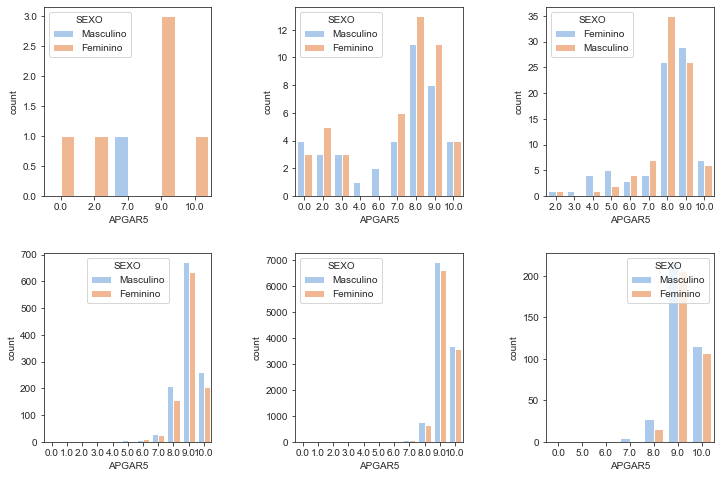

In [164]:
plt.close('all')
plt.rc('figure', figsize=(12, 8))
fig, axes = plt.subplots(2, 3)


sns.set_style('ticks')

sns.countplot(ax = axes[0, 0], x='APGAR5', data=a.loc[a['GESTACAO'] == 'Menos de 22 semanas'], hue='SEXO',palette='pastel')
sns.countplot(ax = axes[0, 1], x='APGAR5', data=a.loc[a['GESTACAO'] == '22 a 27 semanas'], hue='SEXO',palette='pastel')
sns.countplot(ax = axes[0, 2], x='APGAR5', data=a.loc[a['GESTACAO'] == '28 a 31 semanas'], hue='SEXO',palette='pastel')
sns.countplot(ax = axes[1, 0], x='APGAR5', data=a.loc[a['GESTACAO'] == '32 a 36 semanas'], hue='SEXO',palette='pastel')
sns.countplot(ax = axes[1, 1], x='APGAR5', data=a.loc[a['GESTACAO'] == '37 a 41 semanas'], hue='SEXO',palette='pastel')
sns.countplot(ax = axes[1, 2], x='APGAR5', data=a.loc[a['GESTACAO'] == '42 semanas e mais'], hue='SEXO',palette='pastel')

plt.subplots_adjust(wspace=0.5, hspace=0.3)



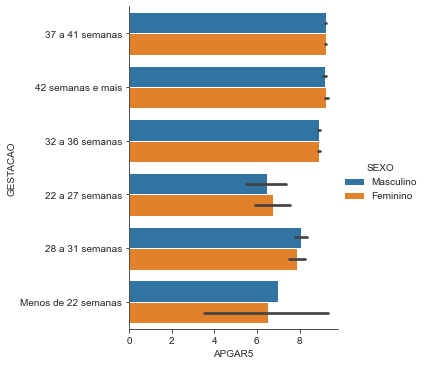

In [170]:
sns.catplot(data=a, x='APGAR5',y='GESTACAO',hue='SEXO',kind='bar')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [174]:
freq = pd.crosstab(a['GESTACAO'], a['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [175]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

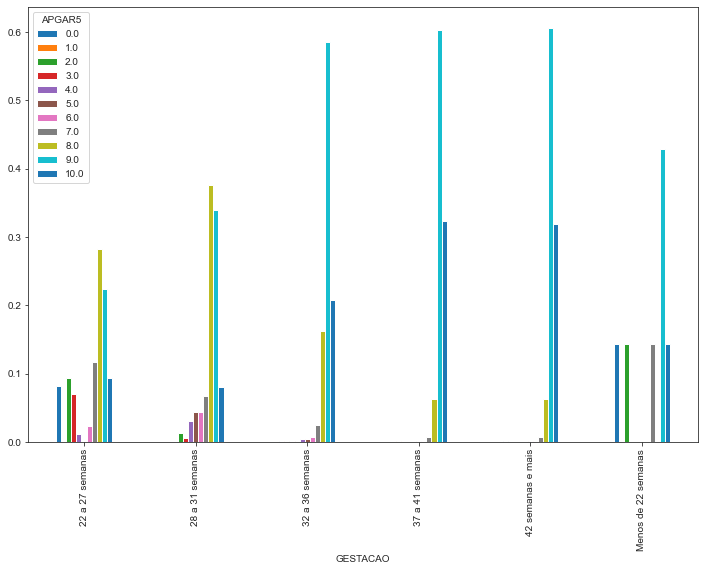

In [176]:
freq_pctlin.plot.bar()

In [203]:
# Sim, de acordo com o gráfico, com menos de 37 semanas as ocorrências de valores de apgar5 menores que 8 são mais significativas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

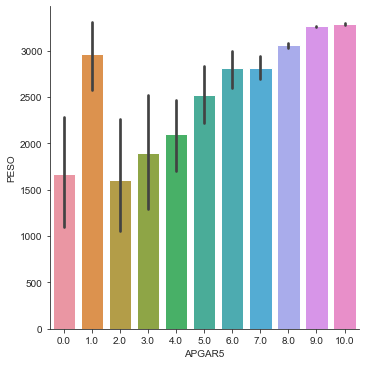

In [180]:
sns.catplot(data=base_sinasc, x='APGAR5',y='PESO',kind='bar')

In [188]:
base_sinasc.loc[base_sinasc['APGAR5'] == 1, 'PESO'].mean()


2966.0416666666665

In [ ]:
# Sim, parece existir uma relação entre o valor de APGAR5 e o peso do bebê, sendo que quanto maior o peso ao nascer, 
# maior o valor de APGAR5, ou seja, mais próximo do valor 'normal'; porém há uma exceção com o valor 1.0 de APGAR5: 
# uma grande quantidade de bebês que nascem com peso maior que 2500 são associados ao valor 1.0 de APGAR5.

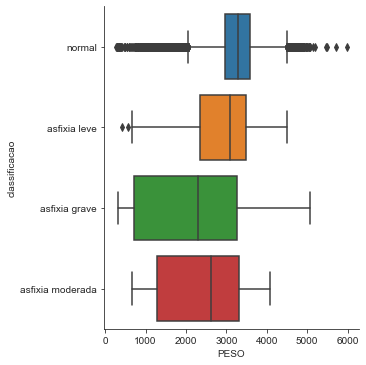

In [194]:
sns.catplot(data=base_sinasc, x="PESO", y="classificacao", kind="box")

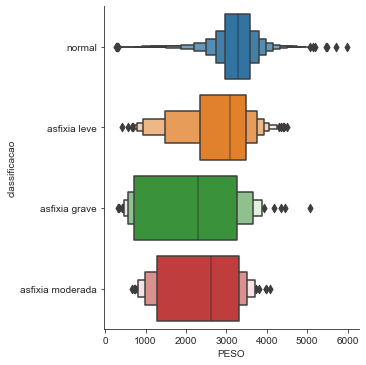

In [195]:
sns.catplot(data=base_sinasc, x="PESO", y="classificacao", kind="boxen")

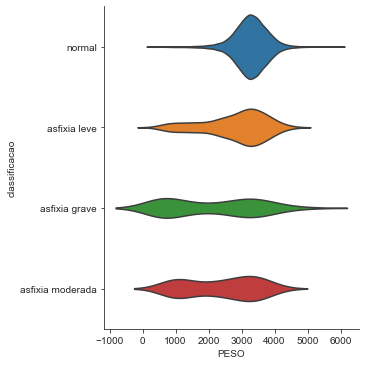

In [202]:
sns.catplot(data=base_sinasc, x="PESO", y="classificacao", kind="violin", inner=None)
